# LV 2.

리코쳇 로봇

https://school.programmers.co.kr/learn/courses/30/lessons/169199

**문제 설명**

    리코쳇 로봇이라는 보드게임이 있습니다.

    이 보드게임은 격자모양 게임판 위에서 말을 움직이는 게임으로, 시작 위치에서 목표 위치까지 최소 몇 번만에 도달할 수 있는지 말하는 게임입니다.

    이 게임에서 말의 움직임은 상, 하, 좌, 우 4방향 중 하나를 선택해서 게임판 위의 장애물이나 맨 끝에 부딪힐 때까지 미끄러져 이동하는 것을 한 번의 이동으로 칩니다.

    다음은 보드게임판을 나타낸 예시입니다.

    ...D..R
    .D.G...
    ....D.D
    D....D.
    ..D....
    여기서 "."은 빈 공간을, "R"은 로봇의 처음 위치를, "D"는 장애물의 위치를, "G"는 목표지점을 나타냅니다.
    위 예시에서는 "R" 위치에서 아래, 왼쪽, 위, 왼쪽, 아래, 오른쪽, 위 순서로 움직이면 7번 만에 "G" 위치에 멈춰 설 수 있으며, 이것이 최소 움직임 중 하나입니다.

    게임판의 상태를 나타내는 문자열 배열 board가 주어졌을 때, 말이 목표위치에 도달하는데 최소 몇 번 이동해야 하는지 return 하는 solution함수를 완성하세요. 만약 목표위치에 도달할 수 없다면 -1을 return 해주세요.
    
**제한 사항**

    3 ≤ board의 길이 ≤ 100
    3 ≤ board의 원소의 길이 ≤ 100
    board의 원소의 길이는 모두 동일합니다.
    문자열은 ".", "D", "R", "G"로만 구성되어 있으며 각각 빈 공간, 장애물, 로봇의 처음 위치, 목표 지점을 나타냅니다.
    "R"과 "G"는 한 번씩 등장합니다.
    
**입출력 예**

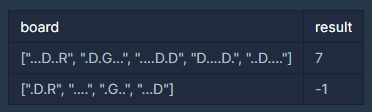


**입출력 예 설명**

    입출력 예 #1

    문제 설명의 예시와 같습니다.

    입출력 예 #2

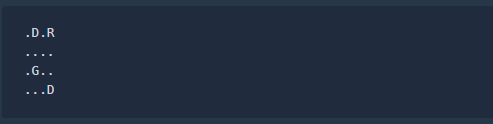


    "R" 위치에 있는 말을 어떻게 움직여도 "G" 에 도달시킬 수 없습니다.
    따라서 -1을 return 합니다.

In [120]:
from collections import deque

def solution(board):
    answer = 0
    n,m = len(board), len(board[0])
    x,y = 0,0
    dx,dy = [1,-1,0,0], [0,0,1,-1]
    
    for i in range(n):
        for j in range(m):
            if board[i][j]=='R':
                x,y= i,j
                break
    
    def dfs():
        queue = deque()
        queue.append((x,y))
        visited = [[0]*m for _ in range(n)]
        visited[x][y]=1
        
        while queue:
            qx,qy = queue.popleft()

            if board[qx][qy] == 'G':
                return visited[qx][qy]

            for i in range(4):
                nx, ny = qx,qy

                while True:
                    nx,ny = nx+dx[i], ny+dy[i]
                    if 0<=nx<n and 0<=ny<m and board[nx][ny]=='D':
                        nx-=dx[i]
                        ny-=dy[i]
                        break
                    if 0>nx or 0>ny or nx>=n or ny>=m:
                        nx-=dx[i]
                        ny-=dy[i]
                        break

                if not visited[nx][ny]:
                    visited[nx][ny] = visited[qx][qy]+1
                    queue.append((nx,ny))
                
        return -1
    
    answer = dfs()
    
    return answer-1 if answer>0 else answer
        

In [121]:
print(solution(["...D..R", ".D.G...", "....D.D", "D....D.", "..D...."]))
print(solution([".D.R", "....", ".G..", "...D"]))

7
-1
